In [24]:
# Importing all the necessary libraries to work with spatial feature extraction

%matplotlib inline
import librosa
import librosa.display
import IPython
import IPython.display
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Loading a sample '.wav' audio file with librosa and display it
y, sr = librosa.load('664.wav') # y represents the data present in the audio file while the the 'sr' represents the sampling rate
Audio(data=y, rate=sr)

In [26]:
# Audio Overview of sample:
print('Audio Sampling rate : ' +str(sr)+ ' samples/sec') # Number of frames per second
print('Total Samples : ' + str(np.size(y))) #total number of samples or frames
secs = np.size(y)/sr
print('Audio Length : '+str(secs)+ 's')

Audio Sampling rate : 22050 samples/sec
Total Samples : 275295
Audio Length : 12.485034013605443s


Text(0.5, 1.0, 'Harmonic + Percussive')

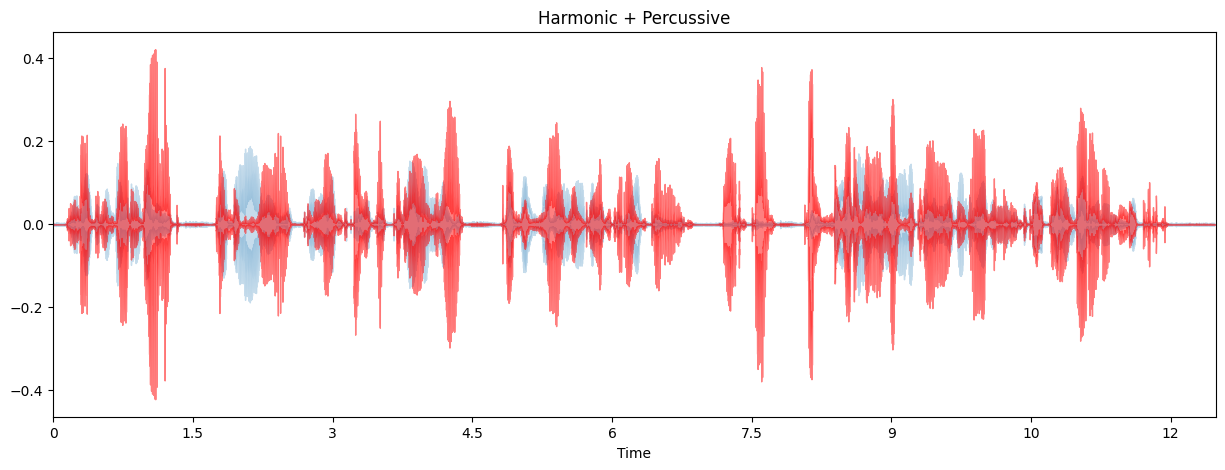

In [27]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveplot(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')


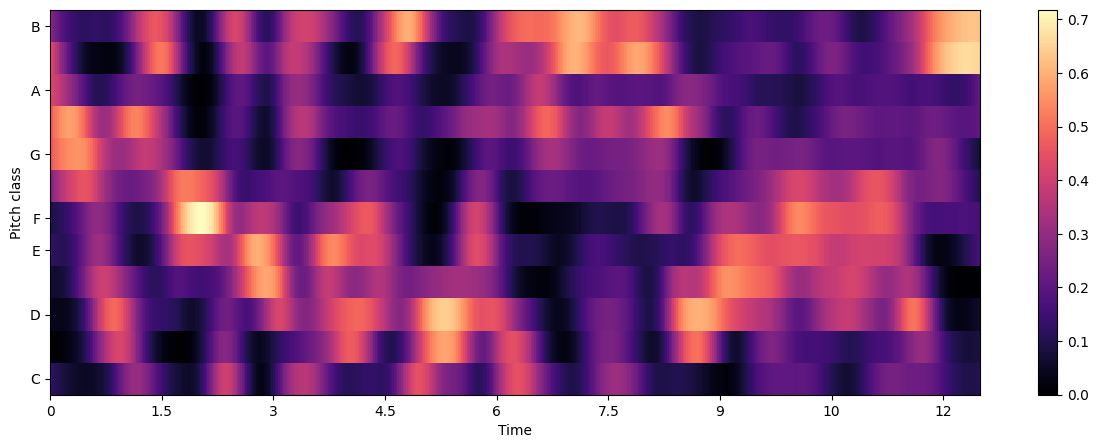

In [28]:
chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()

Text(0.5, 1.0, 'MFCC')

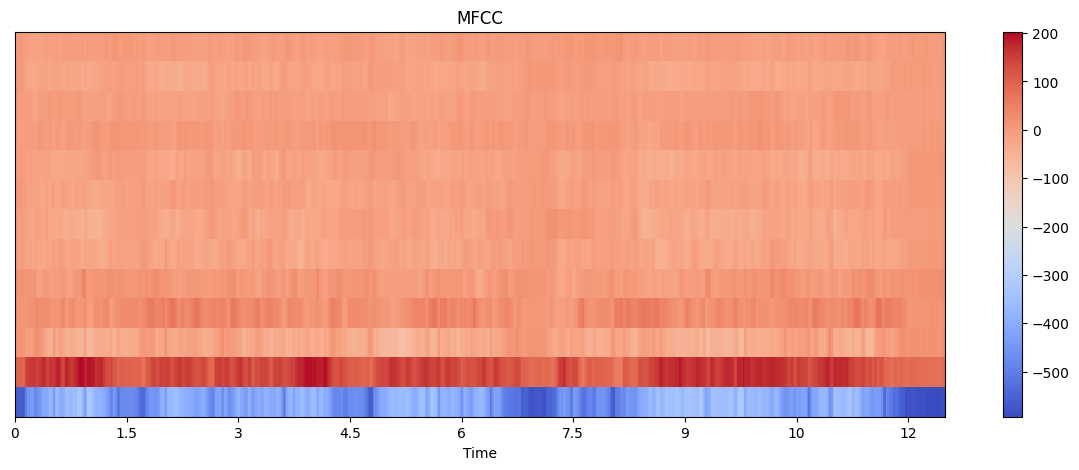

In [29]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')


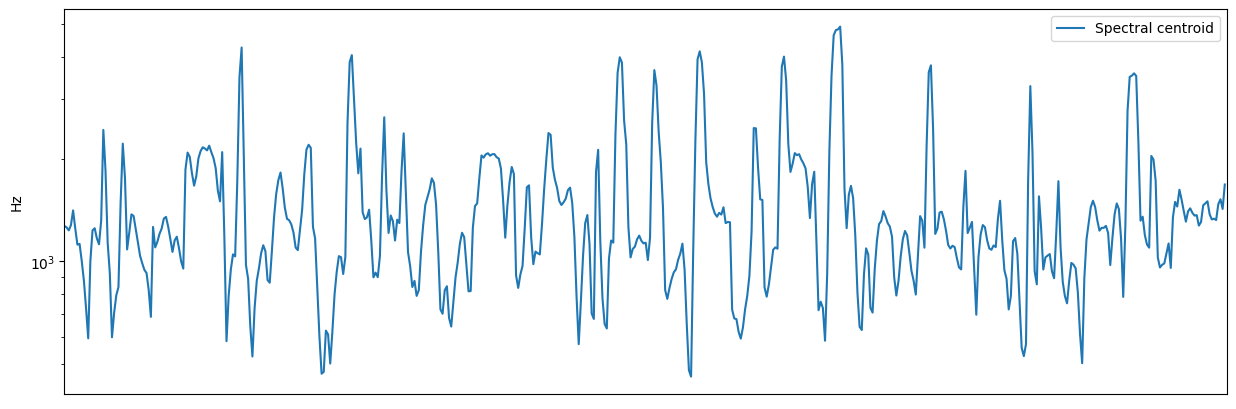

In [30]:


cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()


Text(0.5, 1.0, 'Spectral contrast')

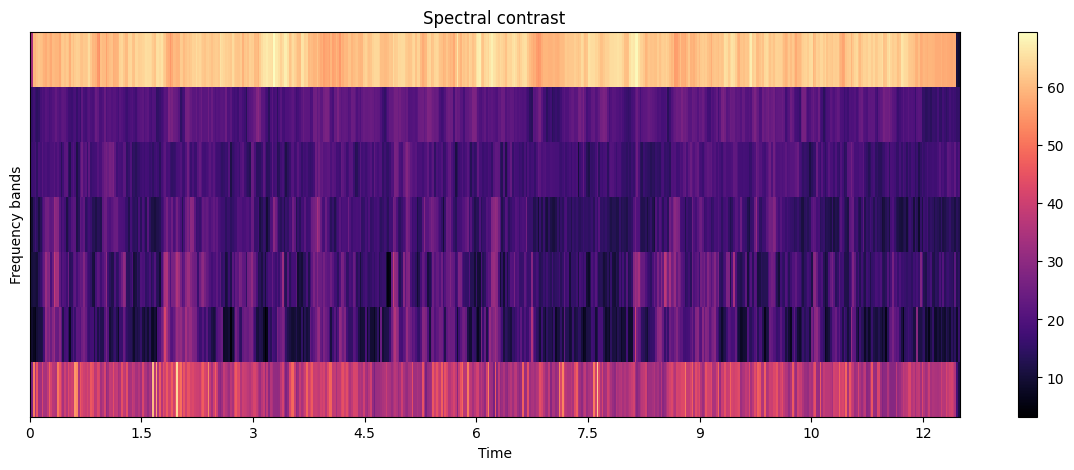

In [31]:
contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')

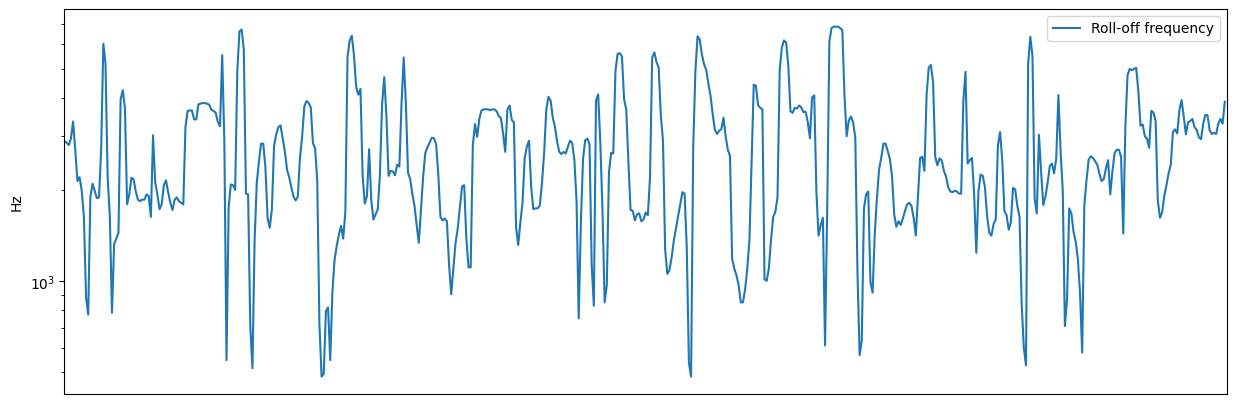

In [32]:


rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

